#Library

In [1]:
!pip install --upgrade gensim

In [2]:
pip install pyldavis==3.2.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyldavis: filename=pyLDAvis-3.2.1-py2.py3-none-any.whl size=136164 sha256=4121701a951b8d07abfb3c3d64220c8db11d6c468efd33f947465099eec1bd4a
  Stored in directory: /root/.cache/pip/wheels/d3/35/9c/c084bb1c3a4b8a7feb32d57c88f572dcf5c3accc949478893f
Successfully built pyldavis


In [3]:
pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.2 MB/s eta 0:00:00


In [4]:
pip install swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16507 sha256=7870b9fd5e7ebf61e5687699ebce30838b1d613db501e00b7f4434950b0cc333
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


#Data

In [6]:
import pandas as pd
import numpy as np
import nltk

import string
import re #regex library

# import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [68]:
df = pd.read_excel('/content/050319_DATAUJI2BARUNEGASI[FIX_3].xlsx')
df

,Tweet,Label
0,amien rais fadli zon pak fahrihamzah selalu te...,-1
1,nakula cakiminow jika tidak pilih saya bagai ...,-1
2,karnaallah wakil presiden nya saja sudah begin...,-1
3,jhonhtjl solidaritas ulama muda sanawi jawa te...,-1
4,ikalimasada imin kalau tidak jadi cawapres ma...,-1
...,...,...
41116,muka dua anda munafik,-1
41117,indonesia itu negara besar dan kuat tidak bis...,1
41118,hormati guru sayangi teman,1
41119,lebih baik jujur dari pada bohong diri sendiri,1


#Preproccess

In [69]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [70]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove tab, new line, and backslash
    text = text.replace('\\t', ' ').replace('\\n', ' ').replace('\\u', '').replace('\\', '')
    # Remove non ASCII characters
    text = text.encode('ascii', 'replace').decode('ascii')
    # Remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)", " ", text).split())
    # Remove incomplete URL
    text = text.replace("http://", " ").replace("https://", " ")
    # Remove numbers
    text = re.sub(r"\d+", "", text)
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Remove leading and trailing whitespace
    text = text.strip()
    # Remove multiple whitespace into single whitespace
    text = re.sub('\s+', ' ', text)
    # Remove single characters
    text = re.sub(r"\b[a-zA-Z]\b", "", text)
    # NLTK word tokenize
    tokens = word_tokenize(text)
    return tokens

df['tweet_preprocess'] = df['Tweet'].apply(preprocess_text)

print('Preprocessing Result:\n')
print(df['tweet_preprocess'].head())

Preprocessing Result:

0    [amien, rais, fadli, zon, pak, fahrihamzah, se...
1    [nakula, cakiminow, jika, tidak, pilih, saya, ...
2    [karnaallah, wakil, presiden, nya, saja, sudah...
3    [jhonhtjl, solidaritas, ulama, muda, sanawi, j...
4    [ikalimasada, imin, kalau, tidak, jadi, cawapr...
Name: tweet_preprocess, dtype: object


In [71]:
df

,Tweet,Label,tweet_preprocess
0,amien rais fadli zon pak fahrihamzah selalu te...,-1,"[amien, rais, fadli, zon, pak, fahrihamzah, se..."
1,nakula cakiminow jika tidak pilih saya bagai ...,-1,"[nakula, cakiminow, jika, tidak, pilih, saya, ..."
2,karnaallah wakil presiden nya saja sudah begin...,-1,"[karnaallah, wakil, presiden, nya, saja, sudah..."
3,jhonhtjl solidaritas ulama muda sanawi jawa te...,-1,"[jhonhtjl, solidaritas, ulama, muda, sanawi, j..."
4,ikalimasada imin kalau tidak jadi cawapres ma...,-1,"[ikalimasada, imin, kalau, tidak, jadi, cawapr..."
...,...,...,...
41116,muka dua anda munafik,-1,"[muka, dua, anda, munafik]"
41117,indonesia itu negara besar dan kuat tidak bis...,1,"[indonesia, itu, negara, besar, dan, kuat, tid..."
41118,hormati guru sayangi teman,1,"[hormati, guru, sayangi, teman]"
41119,lebih baik jujur dari pada bohong diri sendiri,1,"[lebih, baik, jujur, dari, pada, bohong, diri,..."


In [72]:
# Get stopwords from NLTK for Indonesian
list_stopwords = stopwords.words('indonesian')
english = stopwords.words('english')
# Additional stopwords to append
additional_stopwords = pd.read_csv("/content/stopwords_idedit.txt", sep=" ")

# Extend the list of stopwords
list_stopwords.extend(additional_stopwords)
list_stopwords.extend(english)

# Convert the list of stopwords to a set for faster lookup
stopwords_set = list(set(list_stopwords))
# Create Sastrawi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [73]:

def stopword(text):
  #remove stopword
  tokens_without_stopwords = [word for word in text if word not in stopwords_set]
  #sastrawi
  # tweet_stem = stemmer.stem(tokens_without_stopwords)
  tweet_stem = [stemmer.stem(token) for token in tokens_without_stopwords]
  return tweet_stem

term_dict = {}

for document in df['tweet_preprocess']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

df['textdata_stemm'] = df['tweet_preprocess'].apply(stopword)

In [74]:
document

['dasar', 'bocah', 'kampung']

In [75]:
df

,Tweet,Label,tweet_preprocess,textdata_stemm
0,amien rais fadli zon pak fahrihamzah selalu te...,-1,"[amien, rais, fadli, zon, pak, fahrihamzah, se...","[amien, rais, fadli, zon, fahrihamzah, teriak,..."
1,nakula cakiminow jika tidak pilih saya bagai ...,-1,"[nakula, cakiminow, jika, tidak, pilih, saya, ...","[nakula, cakiminow, pilih, cawapres, kalah, du..."
2,karnaallah wakil presiden nya saja sudah begin...,-1,"[karnaallah, wakil, presiden, nya, saja, sudah...","[karnaallah, wakil, presiden, nya, presiden, n..."
3,jhonhtjl solidaritas ulama muda sanawi jawa te...,-1,"[jhonhtjl, solidaritas, ulama, muda, sanawi, j...","[jhonhtjl, solidaritas, ulama, muda, sanawi, j..."
4,ikalimasada imin kalau tidak jadi cawapres ma...,-1,"[ikalimasada, imin, kalau, tidak, jadi, cawapr...","[ikalimasada, imin, cawapres, koalisi, catat, ..."
...,...,...,...,...
41116,muka dua anda munafik,-1,"[muka, dua, anda, munafik]","[muka, munafik]"
41117,indonesia itu negara besar dan kuat tidak bis...,1,"[indonesia, itu, negara, besar, dan, kuat, tid...","[indonesia, negara, kuat, pecah, belah]"
41118,hormati guru sayangi teman,1,"[hormati, guru, sayangi, teman]","[hormat, guru, sayang, teman]"
41119,lebih baik jujur dari pada bohong diri sendiri,1,"[lebih, baik, jujur, dari, pada, bohong, diri,...","[jujur, bohong]"


In [76]:
doc_clean = df['textdata_stemm']

#Lda model

In [77]:
import gensim
import matplotlib.pyplot as plt
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array

In [78]:
dictionary = corpora.Dictionary(doc_clean)
print(dictionary)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

Dictionary<23658 unique tokens: ['amerika', 'amien', 'antek', 'asing', 'bawa']...>


In [79]:
# Specify the filename for saving the dictionary
dictionary_filename = "lda_v1.dict"

# Save the dictionary to the specified file
dictionary.save(dictionary_filename)

In [80]:
#menyimpan corpus
from gensim import corpora

# Simpan doc_term_matrix dalam format Matrix Market (MM)
corpora.MmCorpus.serialize('doc_term_matrix.mm', doc_term_matrix)

In [81]:
from gensim import corpora

def create_lda_inputs(doc_clean):
    # Create a Gensim dictionary
    dictionary = corpora.Dictionary(doc_clean)
    print(dictionary)

    # Generate the document-term matrix
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

    return dictionary, doc_term_matrix

# Assuming you have your doc_clean (preprocessed documents) defined
dictionary, doc_term_matrix = create_lda_inputs(doc_clean)

Dictionary<23658 unique tokens: ['amerika', 'amien', 'antek', 'asing', 'bawa']...>


In [82]:
#kalo make coherence untuk mencari num_topics
#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

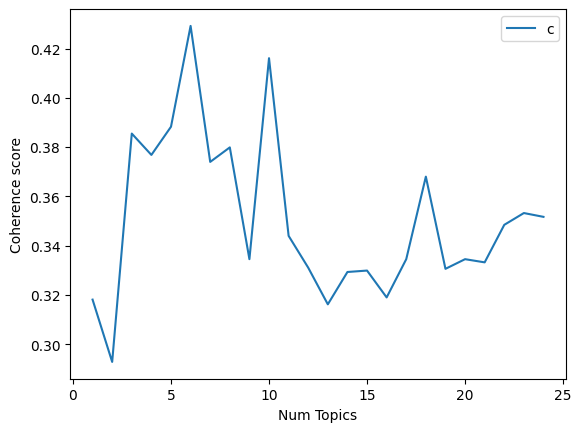

In [83]:
start=1
limit=25
step=1
model_list, coherence_values = compute_coherence_values(dictionary, corpus=doc_term_matrix,
                                                        texts=doc_clean, start=start, limit=limit, step=step)
#show graphs
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [84]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 6))

Num Topics = 1  has Coherence Value of 0.318118
Num Topics = 2  has Coherence Value of 0.292838
Num Topics = 3  has Coherence Value of 0.385492
Num Topics = 4  has Coherence Value of 0.376823
Num Topics = 5  has Coherence Value of 0.388267
Num Topics = 6  has Coherence Value of 0.429169
Num Topics = 7  has Coherence Value of 0.373998
Num Topics = 8  has Coherence Value of 0.379882
Num Topics = 9  has Coherence Value of 0.334532
Num Topics = 10  has Coherence Value of 0.416078
Num Topics = 11  has Coherence Value of 0.34399
Num Topics = 12  has Coherence Value of 0.331072
Num Topics = 13  has Coherence Value of 0.316207
Num Topics = 14  has Coherence Value of 0.329328
Num Topics = 15  has Coherence Value of 0.329904
Num Topics = 16  has Coherence Value of 0.319008
Num Topics = 17  has Coherence Value of 0.334534
Num Topics = 18  has Coherence Value of 0.368016
Num Topics = 19  has Coherence Value of 0.330608
Num Topics = 20  has Coherence Value of 0.334526
Num Topics = 21  has Coherence

In [87]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel
total_topics = 5 # jumlah topik yang akan di extract
number_words = 5 # jumlah kata per topik

In [120]:
# Running and Trainign LDA model on the document term matrix.
Lda = gensim.models.ldamodel.LdaModel
lda_model = Lda(doc_term_matrix, num_topics=total_topics, id2word = dictionary, minimum_probability=0, random_state= 21,alpha= 'symmetric', eta='symmetric')

lda_model.show_topics(num_topics=total_topics, num_words=number_words)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.033*"allah" + 0.023*"tuhan" + 0.021*"hamba" + 0.016*"twitter" + 0.014*"terima"'),
 (1,
  '0.019*"politik" + 0.015*"kerudung" + 0.012*"ilmu" + 0.010*"pks" + 0.010*"sby"'),
 (2,
  '0.033*"allah" + 0.027*"kau" + 0.017*"orang" + 0.017*"hati" + 0.016*"hidup"'),
 (3,
  '0.057*"bangsat" + 0.033*"orang" + 0.013*"bicara" + 0.011*"butuh" + 0.009*"maafin"'),
 (4,
  '0.042*"allah" + 0.026*"hati" + 0.015*"pol" + 0.014*"ramai" + 0.012*"lindung"')]

In [122]:
#jika fungsi
from gensim.models.ldamodel import LdaModel

def perform_lda(doc_term_matrix, total_topics, dictionary, number_words):
    lda_model = LdaModel(doc_term_matrix, num_topics=total_topics, id2word = dictionary, minimum_probability=0, random_state= 21,alpha= 'symmetric', eta='symmetric')
    topics = lda_model.show_topics(num_topics=total_topics, num_words=number_words)
    return topics

# Assuming you have your doc_term_matrix, total_topics, dictionary, and number_words defined
topics = perform_lda(doc_term_matrix, total_topics, dictionary, number_words)

# Printing the topics
for topic_num, words in topics:
    print(f"Topic {topic_num}: {words}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic 0: 0.033*"allah" + 0.023*"tuhan" + 0.021*"hamba" + 0.016*"twitter" + 0.014*"terima"
Topic 1: 0.019*"politik" + 0.015*"kerudung" + 0.012*"ilmu" + 0.010*"pks" + 0.010*"sby"
Topic 2: 0.033*"allah" + 0.027*"kau" + 0.017*"orang" + 0.017*"hati" + 0.016*"hidup"
Topic 3: 0.057*"bangsat" + 0.033*"orang" + 0.013*"bicara" + 0.011*"butuh" + 0.009*"maafin"
Topic 4: 0.042*"allah" + 0.026*"hati" + 0.015*"pol" + 0.014*"ramai" + 0.012*"lindung"


In [171]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix))
# a measure of how good the model is. lower the better.


Perplexity:  -8.546683831301154


In [123]:
# Word Count of Topic Keywords
from collections import Counter
topics = lda_model.show_topics(num_words=number_words,formatted=False)
data_flat = [w for w_list in doc_clean for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df_imp_wcount = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])
print(df_imp_wcount)

        word  topic_id  importance  word_count
0      allah         0    0.033273        3023
1      tuhan         0    0.022843         869
2      hamba         0    0.020756         329
3    twitter         0    0.016148         537
4     terima         0    0.014166         833
5    politik         1    0.019449         894
6   kerudung         1    0.015148         469
7       ilmu         1    0.012095         686
8        pks         1    0.010263         434
9        sby         1    0.009991         249
10     allah         2    0.032868        3023
11       kau         2    0.026555        2055
12     orang         2    0.017119        6164
13      hati         2    0.016975        2249
14     hidup         2    0.016028        1626
15   bangsat         3    0.057491        3144
16     orang         3    0.032880        6164
17    bicara         3    0.013267        1135
18     butuh         3    0.010789         681
19    maafin         3    0.009305         454
20     allah 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# def calculate_topic_importance(lda_model, doc_clean):
#     # Word Count of Topic Keywords
#     topics = lda_model.show_topics(formatted=False)
#     data_flat = [w for w_list in doc_clean for w in w_list]
#     counter = Counter(data_flat)

#     out = []
#     for i, topic in topics:
#         for word, weight in topic:
#             out.append([word, i, weight, counter[word]])

#     df_imp_wcount = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])
#     return df_imp_wcount

# # Assuming you have your lda_model and doc_clean (preprocessed documents) defined
# df_importance_wordcount = calculate_topic_importance(lda_model, doc_clean)
# print(df_importance_wordcount)

In [ ]:
from google.colab import drive
drive.mount('drive')

In [124]:
import json

# Initialize an empty list to store the topics data
topics_data = []

# Group the DataFrame by 'topic_id'
grouped = df_imp_wcount.groupby('topic_id')

# Iterate through each group (topic)
for topic_id, group_data in grouped:
    # Extract the top words, importance, and word count for the topic
    top_words = group_data['word'].tolist()
    importance = group_data['importance'].tolist()
    word_count = group_data['word_count'].tolist()

    # Create a dictionary for the topic
    topic_dict = {
        "topic_id": int(topic_id),
        "top_words": top_words,
        "importance": importance,
        "word_count": word_count
    }

    # Append the topic dictionary to the list of topics
    topics_data.append(topic_dict)

# Create the final JSON structure
output_json = {
    "topics": topics_data
}

# Convert the JSON structure to a JSON-formatted string
json_string = json.dumps(output_json, indent=4)

# Save the JSON to a file (optional)
with open('lda_topic_data1.json', 'w') as json_file:
    json_file.write(json_string)

# # Print the JSON string
# print(json_string)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#simpan ke google drive
df_imp_wcount.to_csv('df_imp_wcount2.csv')
!cp df_imp_wcount.csv "drive/My Drive/Colab Notebooks/LDA Indonesia/"
# #jika simpan ke local drive
# filedisimpan='df_imp_wcount.xlsx'
# df_imp_wcount.to_excel(filedisimpan, index = False, header=True)

cp: cannot stat 'df_imp_wcount.csv': No such file or directory


In [31]:
filedisimpan='df_imp_wcountnew.xlsx'
df_imp_wcount.to_excel(filedisimpan, index = False, header=True)

In [125]:
#Dominant topic and its percentage contribution in each topic
def format_topics_sentences(ldamodel=None, corpus=doc_term_matrix, texts=document):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num,number_words)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [127]:
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [128]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=doc_term_matrix, texts=doc_clean)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
print(df_dominant_topic.head(10))

   Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0               1              0.7728   
1            1               2              0.5383   
2            2               1              0.9455   
3            3               0              0.6363   
4            4               1              0.5396   
5            5               1              0.5846   
6            6               1              0.7728   
7            7               2              0.6014   
8            8               1              0.5218   
9            9               1              0.6622   

                               Keywords  \
0     politik, kerudung, ilmu, pks, sby   
1        allah, kau, orang, hati, hidup   
2     politik, kerudung, ilmu, pks, sby   
3  allah, tuhan, hamba, twitter, terima   
4     politik, kerudung, ilmu, pks, sby   
5     politik, kerudung, ilmu, pks, sby   
6     politik, kerudung, ilmu, pks, sby   
7        allah, kau, orang, hati, hidup   
8     politik, ker

In [129]:
import json

# Create an empty dictionary for topics
topics_dict = {}

# Iterate through each row in the DataFrame to build the topics dictionary
for index, row in df_dominant_topic.iterrows():
    dominant_topic = int(row['Dominant_Topic'])
    keywords = row['Keywords']

    # Split keywords into a list
    keyword_list = keywords.split(', ')

    # Create a dictionary entry for the topic
    topics_dict[dominant_topic] = keyword_list

# Create an empty list to store the topics data
topics_data = []

# Iterate through each row in the DataFrame
for index, row in df_dominant_topic.iterrows():
    # Extract relevant information from the row
    document_no = int(row['Document_No'])
    dominant_topic = int(row['Dominant_Topic'])
    topic_perc_contrib = row['Topic_Perc_Contrib']
    text = row['Text']

    # Create a dictionary for the row
    row_dict = {
        "Document_No": document_no,
        "Dominant_Topic": dominant_topic,
        "Topic_Perc_Contrib": topic_perc_contrib,
        "Text": text
    }

    # Append the row dictionary to the list of topics data
    topics_data.append(row_dict)

# Create the final JSON structure
output_json = {
    "topic": topics_dict,
    "topics_data": topics_data
}

# Convert the JSON structure to a JSON-formatted string with indentation
json_string = json.dumps(output_json, indent=4)

# Print the JSON string or save it to a file (optional)
with open('lda_topic_sents_keywords.json', 'w') as json_file:
    json_file.write(json_string)

# Print the JSON string
print(json_string)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
#simpan ke google drive
df_dominant_topic.to_csv('df_dominant_topic1.csv')
!cp df_dominant_topic.csv "drive/My Drive/Colab Notebooks/LDA Indonesia/"

cp: cannot stat 'df_dominant_topic.csv': No such file or directory


In [36]:
#jika simpan ke local drive
filedisimpan='df_dominant_topicnew.xlsx'
df_dominant_topic.to_excel(filedisimpan, index = False, header=True)

In [130]:
import pyLDAvis.gensim
import pickle
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()

In [131]:
import os
LDAvis_data_filepath = os.path.join('ldavis_prepared_'+str(total_topics))

In [132]:
corpus = [dictionary.doc2bow(text) for text in doc_clean]
print(corpus  )

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [133]:
# proses ini mungkin agak lama
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

In [134]:
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

In [135]:
pyLDAvis.save_html(LDAvis_prepared, '/content/ldavis_preparedcoba2_'+ str(total_topics) +'.html')

In [136]:
# proses ini mungkin agak lama
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.160495 -0.065710       1        1  26.646932
2     -0.024888 -0.146042       2        1  25.004747
1     -0.044568  0.275629       3        1  18.567805
0     -0.053110 -0.048143       4        1  15.796423
4      0.283060 -0.015734       5        1  13.984094, topic_info=         Term         Freq        Total Category  logprob  loglift
3426  bangsat  6497.000000  6497.000000  Default  30.0000  30.0000
3098      kau  2694.000000  2694.000000  Default  29.0000  29.0000
353     allah  8693.000000  8693.000000  Default  28.0000  28.0000
2597    tuhan  1458.000000  1458.000000  Default  27.0000  27.0000
343      hati  3523.000000  3523.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
121   politik   490.172665  1990.736248   Topic5  -4.7473   0.5657
712     bikin   395.916560  1463.627036   Topic5  -4.9609   0.6598
140     orang   531.786141  6481.065601   Topic5  -4.6659  -0.5331
1906   sayang   302.464705   983.210061   Topic5  -5.2301   0.7884
52      ulama   251.198366   506.999960   Topic5  -5.4159   1.2650

[358 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
3959      3  0.960044  aamiin
3959      4  0.022327  aamiin
3959      5  0.015948  aamiin
3553      5  0.992148    abai
1360      5  0.992834     adu
...     ...       ...     ...
1806      4  0.019175   usaha
1806      5  0.027249   usaha
3757      1  0.993050    usia
2121      1  0.997050   wajar
4352      5  0.993574   watak

[737 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 2, 1, 5])

In [139]:
from gensim.test.utils import datapath

In [140]:
lda_model.save("/content/model/lda_model2")

In [ ]:
!zip -r '/content/model_lda.zip' '/content/model' '/content/df_dominant_topicnew.xlsx' '/content/df_imp_wcountnew.xlsx'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  adding: content/model/ (stored 0%)
  adding: content/model/test_model23.model (deflated 96%)
  adding: content/model/test_model23.model.state (deflated 28%)
  adding: content/model/test_model23.model.expElogbeta.npy (deflated 50%)
  adding: content/model/test_model23.model.id2word (deflated 48%)
  adding: content/df_dominant_topicnew.xlsx (deflated 1%)
  adding: content/df_imp_wcountnew.xlsx (deflated 7%)


In [ ]:
import shutil
shutil.copy("/content/model_lda.zip","/content/drive/My Drive/model_lda.zip")

In [68]:
!zip -r LDa_model.zip '/content/LDA_Indonesia' '/content/df_dominant_topicnew.xlsx' '/content/df_imp_wcountnew.xlsx' '/content/doc_term_matrix.mm' '/content/doc_term_matrix.mm.index' '/content/lda_topic_data.json' '/content/lda_topic_sents_keywords2.json' '/content/lda_v1.dict' '/content/ldavis_prepared_5'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


updating: content/LDA_Indonesia/ (stored 0%)
updating: content/LDA_Indonesia/ldavis_preparedcoba2_5.html (deflated 61%)
updating: content/LDA_Indonesia/model/ (stored 0%)
updating: content/LDA_Indonesia/model/lda_model2.state (deflated 32%)
updating: content/LDA_Indonesia/model/lda_model1.expElogbeta.npy (deflated 27%)
updating: content/LDA_Indonesia/model/lda_model2.expElogbeta.npy (deflated 27%)
updating: content/LDA_Indonesia/model/lda_model2.id2word (deflated 48%)
updating: content/LDA_Indonesia/model/lda_model1 (deflated 96%)
updating: content/LDA_Indonesia/model/lda_model1.id2word (deflated 48%)
updating: content/LDA_Indonesia/model/.ipynb_checkpoints/ (stored 0%)
updating: content/LDA_Indonesia/model/lda_model1.state (deflated 32%)
updating: content/LDA_Indonesia/model/lda_model2 (deflated 96%)
updating: content/LDA_Indonesia/.ipynb_checkpoints/ (stored 0%)
  adding: content/df_dominant_topicnew.xlsx (deflated 1%)
  adding: content/df_imp_wcountnew.xlsx (deflated 8%)
  adding: c

#imporve


In [160]:
#dapatkan vector untuk x dan y
hm = np.array([[y for (x,y) in lda_model[doc_term_matrix[i]]] for i in range(len(doc_term_matrix))])

In [161]:
arr = pd.DataFrame(hm).fillna(0).values
print(arr)

[[0.14459038 0.7727607  0.06244199 0.01007497 0.01013204]
 [0.01335262 0.42121553 0.53832304 0.01369616 0.01341263]
 [0.01365003 0.94545984 0.01364335 0.01363392 0.01361289]
 ...
 [0.24454726 0.04194738 0.6329426  0.040223   0.04033973]
 [0.06905212 0.06737323 0.40744257 0.06714577 0.3889863 ]
 [0.05001296 0.05001298 0.05038479 0.7995203  0.0500689 ]]


In [162]:
topic_num = np.argmax(arr, axis=1)

In [163]:
from sklearn.manifold import TSNE
# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=21, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 41121 samples in 0.038s...
[t-SNE] Computed neighbors for 41121 samples in 1.542s...
[t-SNE] Computed conditional probabilities for sample 1000 / 41121
[t-SNE] Computed conditional probabilities for sample 2000 / 41121
[t-SNE] Computed conditional probabilities for sample 3000 / 41121
[t-SNE] Computed conditional probabilities for sample 4000 / 41121
[t-SNE] Computed conditional probabilities for sample 5000 / 41121
[t-SNE] Computed conditional probabilities for sample 6000 / 41121
[t-SNE] Computed conditional probabilities for sample 7000 / 41121
[t-SNE] Computed conditional probabilities for sample 8000 / 41121
[t-SNE] Computed conditional probabilities for sample 9000 / 41121
[t-SNE] Computed conditional probabilities for sample 10000 / 41121
[t-SNE] Computed conditional probabilities for sample 11000 / 41121
[t-SNE] Computed conditional probabilities for sample 12000 / 41121
[t-SNE] Computed conditional probabilities for sam

In [165]:
# Create a scatter plot
x = tsne_lda[:, 0]
y = tsne_lda[:, 1]
coordinatess = pd.DataFrame({'X': x, 'Y': y})
print(coordinatess)

               X          Y
0       2.472249  79.589417
1      75.479118  41.178570
2     -34.639004  97.532394
3      43.611462  61.218662
4     -14.024311  37.525215
...          ...        ...
41116 -31.354866 -18.761463
41117 -15.645311 -63.901798
41118  74.039696  -4.884316
41119  36.087093  -4.746257
41120 -35.848740 -65.713982

[41121 rows x 2 columns]


In [166]:
 # Visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib
%matplotlib inline
from sklearn.manifold import TSNE
import seaborn as sns
# Bokeh

from bokeh.plotting import figure, show,output_notebook
from bokeh.models import HoverTool, CustomJS, ColumnDataSource, Slider, Label
from bokeh.layouts import column
from bokeh.palettes import all_palettes
from matplotlib import colors as mcolors
output_notebook()

In [168]:
output_notebook()
n_topics = 5
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics),
              min_width=900, min_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

In [170]:
import json
import pandas as pd
from sklearn.manifold import TSNE

# # Create a scatter plot
# tsne_model = TSNE(n_components=2, verbose=1, random_state=21, angle=.99, init='pca')
# tsne_lda = tsne_model.fit_transform(arr)  # Replace 'arr' with your data

# # Extract X and Y coordinates
# x = tsne_lda[:, 0]
# y = tsne_lda[:, 1]

# Calculate the minimum and maximum values for X and Y
xmin = float(min(x))
xmax = float(max(x))
ymin = float(min(y))
ymax = float(max(y))

# Create an empty dictionary for topics
topics_dict = {}

# Iterate through each row in the DataFrame to build the topics dictionary
for index, row in df_dominant_topic.iterrows():
    dominant_topic = int(row['Dominant_Topic'])
    keywords = row['Keywords']

    # Split keywords into a list
    keyword_list = keywords.split(', ')

    # Create a dictionary entry for the topic
    topics_dict[dominant_topic] = keyword_list

# Create an empty list to store the topics data
topics_data = []

# Iterate through each row in the DataFrame
for index, row in df_dominant_topic.iterrows():
    # Extract relevant information from the row
    document_no = int(row['Document_No'])
    dominant_topic = int(row['Dominant_Topic'])
    topic_perc_contrib = float(row['Topic_Perc_Contrib'])
    text = row['Text']

    # Create a dictionary for the row
    row_dict = {
        "Document_No": document_no,
        "x": float(x[index]),  # Add X coordinate
        "y": float(y[index]),  # Add Y coordinate
        "Dominant_Topic": dominant_topic,
        "Topic_Perc_Contrib": topic_perc_contrib,
        "Text": text
    }

    # Append the row dictionary to the list of topics data
    topics_data.append(row_dict)

# Create the final JSON structure
output_json = {
    "x": [xmin, xmax],  # Add X coordinate range
    "y": [ymin, ymax],  # Add Y coordinate range
    "topic": topics_dict,
    "topics_data": topics_data
}

# Convert the JSON structure to a JSON-formatted string with indentation
json_string = json.dumps(output_json, indent=4)

# Print the JSON string or save it to a file (optional)
with open('lda_topic_sents_keywordsfix.json', 'w') as json_file:
    json_file.write(json_string)

# Print the JSON string
print(json_string)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

